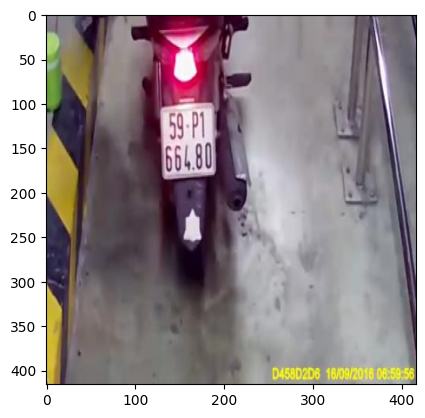

In [30]:
## Chuyển ảnh có kích thước bất kì về 1 kích thước chuẩn là 448, 448
import numpy as np
import cv2, matplotlib.pyplot as plt
def process_img(img, size):
    size = size[1], size[0]
    zoom_r = np.array(img.size)/np.array(size)
    img = cv2.resize(img, size, interpolation = cv2.INTER_AREA)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = np.array(img)
    return img, zoom_r

image = cv2.imread("D:\\Number Plate Region\\Mydata\\TrainImage\\0000_00532_b.jpg")
img, zoom_r = process_img(image, (416, 416))
plt.imshow(img)
plt.show()


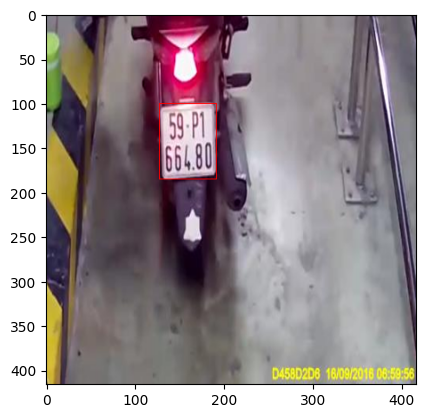

In [31]:
from bs4 import BeautifulSoup
import json
from io import BytesIO
import os
from PIL import Image, ImageDraw
class_names = ['motobike']
size = (416, 416)

def _process_img(img, size):
    size = size[1], size[0]
    zoom_r = np.array(img.size)/np.array(size)
    img = img.resize(size)
    img = img.convert("RGB")
    img = np.array(img)
    return img, zoom_r

with open(os.path.join("D:\\Number Plate Region\\Mydata\\XMLTrainImage\\0000_00532_b.xml"),
            encoding="utf-8") as f:
    soup = BeautifulSoup(f.read(), "xml")

img = Image.open('D:\\Number Plate Region\\Mydata\\TrainImage\\0000_00532_b.jpg')
img, zoom_r = _process_img(img, size)

bbs = []
labels = []
for obj in soup.select("object"):
    if obj.select_one("name").text in class_names:
        label = class_names.index(obj.select_one("name").text)
        labels.append(label)
        xmin = int(obj.select_one("xmin").text)/zoom_r[0]
        xmax = int(obj.select_one("xmax").text)/zoom_r[0]
        ymin = int(obj.select_one("ymin").text)/zoom_r[1]
        ymax = int(obj.select_one("ymax").text)/zoom_r[1]

img_draw = Image.fromarray(img)
draw = ImageDraw.Draw(img_draw)
draw.rectangle([xmin, ymin, xmax, ymax], outline='red')
plt.imshow(img_draw)
plt.show()

In [39]:
grid_shape=(7, 7)
class_num = 1
path_list_len = 1
aug_times = 1
pos = 0
label_data = np.zeros((path_list_len*aug_times,
                           *grid_shape,
                           5 + class_num))

grid_height = img.shape[0]/grid_shape[0]
grid_width = img.shape[1]/grid_shape[1]
img_height = img.shape[0]
img_width = img.shape[1]

x = (xmin + (xmax-xmin)/2)
y = (ymin + (ymax-ymin)/2)
w = (xmax-xmin)
h = (ymax-ymin)

x_i = int(x//grid_width) #Grid x coordinate
y_i = int(y//grid_height) #Grid y coordinate

if x_i < grid_shape[1] and y_i < grid_shape[0]:
    if label_data[pos, y_i, x_i, 4] == 1: 
        #Detect whether objects overlap
        print("Notice! Repeat!:", "", y_i, x_i)

    label_data[pos, y_i, x_i, 0] = (
        x%grid_width/grid_width)
    label_data[pos, y_i, x_i, 1] = (
        y%grid_height/grid_height)
    label_data[pos, y_i, x_i, 2] = (
        w/img_width)
    label_data[pos, y_i, x_i, 3] = (
        h/img_height)
    label_data[pos, y_i, x_i, 4] = 1
    label_data[pos, y_i, x_i, 5] = 1

print(label_data[..., 5])

[[[0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 1. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0.]]]
